### n-step SARSA vs SARSA($\lambda$)

Implementation :

* n-step SARSA
* SARSA($\lambda$)

**Domain Description :**

**States :**

For the purpose of this experiment a 4x4 GridWorld has been chosen.

Start state : state '00' is the start state

Terminal state : state '15' is the end state

**Action :**

Up, down, left and right (all of which are equally likely at every state)

** Reward Structure :**

* If the robot hits the wall of the grid : 0
* If the robot reaches the exit : +1
* Everywhere else : -1

**Environment :**

In [116]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pprint

In [134]:
#Discount Factor
GAMMA = 1

#Number of Episodes
NUM_EPISODES = 100

EPSILON = 0.1

#Number of Runs (for smoothening)
n_runs = 100

#Different learning parameters
alphas = [0.01, 0.02, 0.3, 0.5, 0.8, 0.9]
#alphas = [0.5]

#Maximum Episode Length
MAX_EPISODE_LENGTH = 500

all_n = [1, 2, 4, 8, 16, 32, 64, 128]

lambdas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]

In [3]:
#Define States
states = ['00', '01', '02','03',
          '04', '05','06', '07',
          '08', '09', '10', '11',
          '12', '13', '14','15']

In [4]:
START_STATE = '00'
EXIT_STATE = '15'

In [5]:
intermediate_states = [s for s in states if s not in EXIT_STATE]

In [6]:
#Define Actions
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

UP = 'UP'
DOWN = 'DOWN'
LEFT = 'LEFT'
RIGHT = 'RIGHT'

In [7]:
state_transitions = {
                '00' : {UP : '00', DOWN : '04', LEFT : '00', RIGHT : '01'},
                '01' : {UP : '01', DOWN : '05', LEFT : '00', RIGHT : '02'},
                '02' : {UP : '02', DOWN : '06', LEFT : '01', RIGHT : '03'},
                '03' : {UP : '03', DOWN : '07', LEFT : '02', RIGHT : '03'},   
                '04' : {UP : '00', DOWN : '08', LEFT : '04', RIGHT : '05'}, 
                '05' : {UP : '01', DOWN : '09', LEFT : '04', RIGHT : '06'},
                '06' : {UP : '02', DOWN : '10', LEFT : '05', RIGHT : '07'},   
                '07' : {UP : '03', DOWN : '11', LEFT : '06', RIGHT : '07'},    
                '08' : {UP : '04', DOWN : '12', LEFT : '08', RIGHT : '09'},
                '09' : {UP : '05', DOWN : '13', LEFT : '08', RIGHT : '10'},
                '10' : {UP : '06', DOWN : '14', LEFT : '09', RIGHT : '11'},
                '11' : {UP : '07', DOWN : '15', LEFT : '10', RIGHT : '11'},
                '12' : {UP : '08', DOWN : '12', LEFT : '12', RIGHT : '13'},
                '13' : {UP : '09', DOWN : '13', LEFT : '12', RIGHT : '14'},
                '14' : {UP : '10', DOWN : '14', LEFT : '13', RIGHT : '15'},
                '15' : {UP : '15', DOWN : '15', LEFT : '15', RIGHT : '15'}
              }

In [8]:
def initializeQ():
    Q = {
    '00' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '01' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '02' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '03' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},   
    '04' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0}, 
    '05' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '06' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},   
    '07' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},    
    '08' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '09' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '10' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '11' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '12' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '13' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '14' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0},
    '15' : {UP : 0, DOWN : 0, LEFT : 0, RIGHT : 0}
    }
    return Q

In [9]:
def chooseGreedyAction(state, Q):
    bestAction = 'UP'
    maxQ = Q[state][bestAction]
    for action in actions:
        if Q[state][action] > maxQ:
            maxQ = Q[state][action]
            bestAction = action
    return bestAction

In [10]:
def generateActionBehaviorPolicy(state, epsilon, Q):
    explore_prob = random.uniform(0,1)
    
    if explore_prob >= epsilon:
        #Exploit
        action = chooseGreedyAction(state, Q)
        return action
    else:
        #Explore
        random_prob = random.uniform(0,1)
        #print random_prob
        if random_prob >= 0.75:
            return 'RIGHT'
        elif random_prob >= 0.5:
            return 'DOWN'
        elif random_prob >= 0.25:
            return 'LEFT'
        else:
            return 'UP'

In [11]:
def immediateReward(currentState, action):
    nextState = state_transitions[currentState][action]
    if currentState == nextState:
        reward = 0
    elif nextState in EXIT_STATE:
        reward = 1
    else:
        reward = -1
    return reward

In [12]:
def generateEpisodeBehaviorPolicy(epsilon, Q):
    state = START_STATE
    episodes = []
    all_states = []
    all_actions = []
    all_rewards = []
    
    while (state != EXIT_STATE) and len(all_states) <= MAX_EPISODE_LENGTH:
        action = generateActionBehaviorPolicy(state, epsilon, Q)
        reward = immediateReward(state, action)
        all_states.append(state)
        all_actions.append(action)
        all_rewards.append(reward)
        state = state_transitions[state][action]
    episodes.append(zip(all_states, all_actions, all_rewards))
    return episodes

In [146]:
#SARSA Considered as ground truth

In [36]:
NUM_EPISODES = 50000
ALPHA = 0.01

In [37]:
def sarsa(EPSILON, ALPHA):

    Q = initializeQ()

    for episode_i in range(NUM_EPISODES):
        episode = generateEpisodeBehaviorPolicy(EPSILON, Q)

        for step in range(len(episode[0])):
            state, action, reward = episode[0][step]
            if (step == len(episode[0]) - 1):
                exp_return = reward
            else:
                nextState, nextAction, nextReward = episode[0][step + 1]
                exp_return = reward + GAMMA * Q[nextState][nextAction]
            Q[state][action] += ALPHA * (exp_return - Q[state][action])
    return Q

In [38]:
actualQvalues = sarsa(EPSILON, ALPHA)

In [115]:
pprint.pprint(actualQvalues)

{'00': {'DOWN': -4.458960550873428,
        'LEFT': -4.452332809532763,
        'RIGHT': -4.469001606751578,
        'UP': -4.452403325714546},
 '01': {'DOWN': -3.4437755026900887,
        'LEFT': -5.414972703811357,
        'RIGHT': -3.4036124820445215,
        'UP': -3.441162658704911},
 '02': {'DOWN': -2.367609720607879,
        'LEFT': -4.380284404500258,
        'RIGHT': -2.3914535036075812,
        'UP': -2.4046259998197064},
 '03': {'DOWN': -1.2909698751871868,
        'LEFT': -3.305262037921729,
        'RIGHT': -1.3783752269527179,
        'UP': -1.4399782398571095},
 '04': {'DOWN': -3.390630171608507,
        'LEFT': -3.459562499202589,
        'RIGHT': -3.4777874471321923,
        'UP': -5.417418336006802},
 '05': {'DOWN': -2.3447853101704954,
        'LEFT': -4.238182146618922,
        'RIGHT': -2.3886197811303407,
        'UP': -4.253106340682532},
 '06': {'DOWN': -1.2411487459889543,
        'LEFT': -3.3355464050737877,
        'RIGHT': -1.3429557586970438,
        'UP': 

In [114]:
realStateValues = np.asarray([actualQvalues[state][action] for state in states for action in actions])

### On Policy n-step SARSA

In [41]:
#Discount Factor
GAMMA = 1

#Number of Episodes
NUM_EPISODES = 100

EPSILON = 0.1

#Number of Runs (for smoothening)
n_runs = 10

#Different learning parameters
alphas = [0.01, 0.05, 0.1, 0.5]
#alphas = [0.5]

#Maximum Episode Length
MAX_EPISODE_LENGTH = 500

all_n = [1, 2, 4, 8, 16, 32, 64, 128]

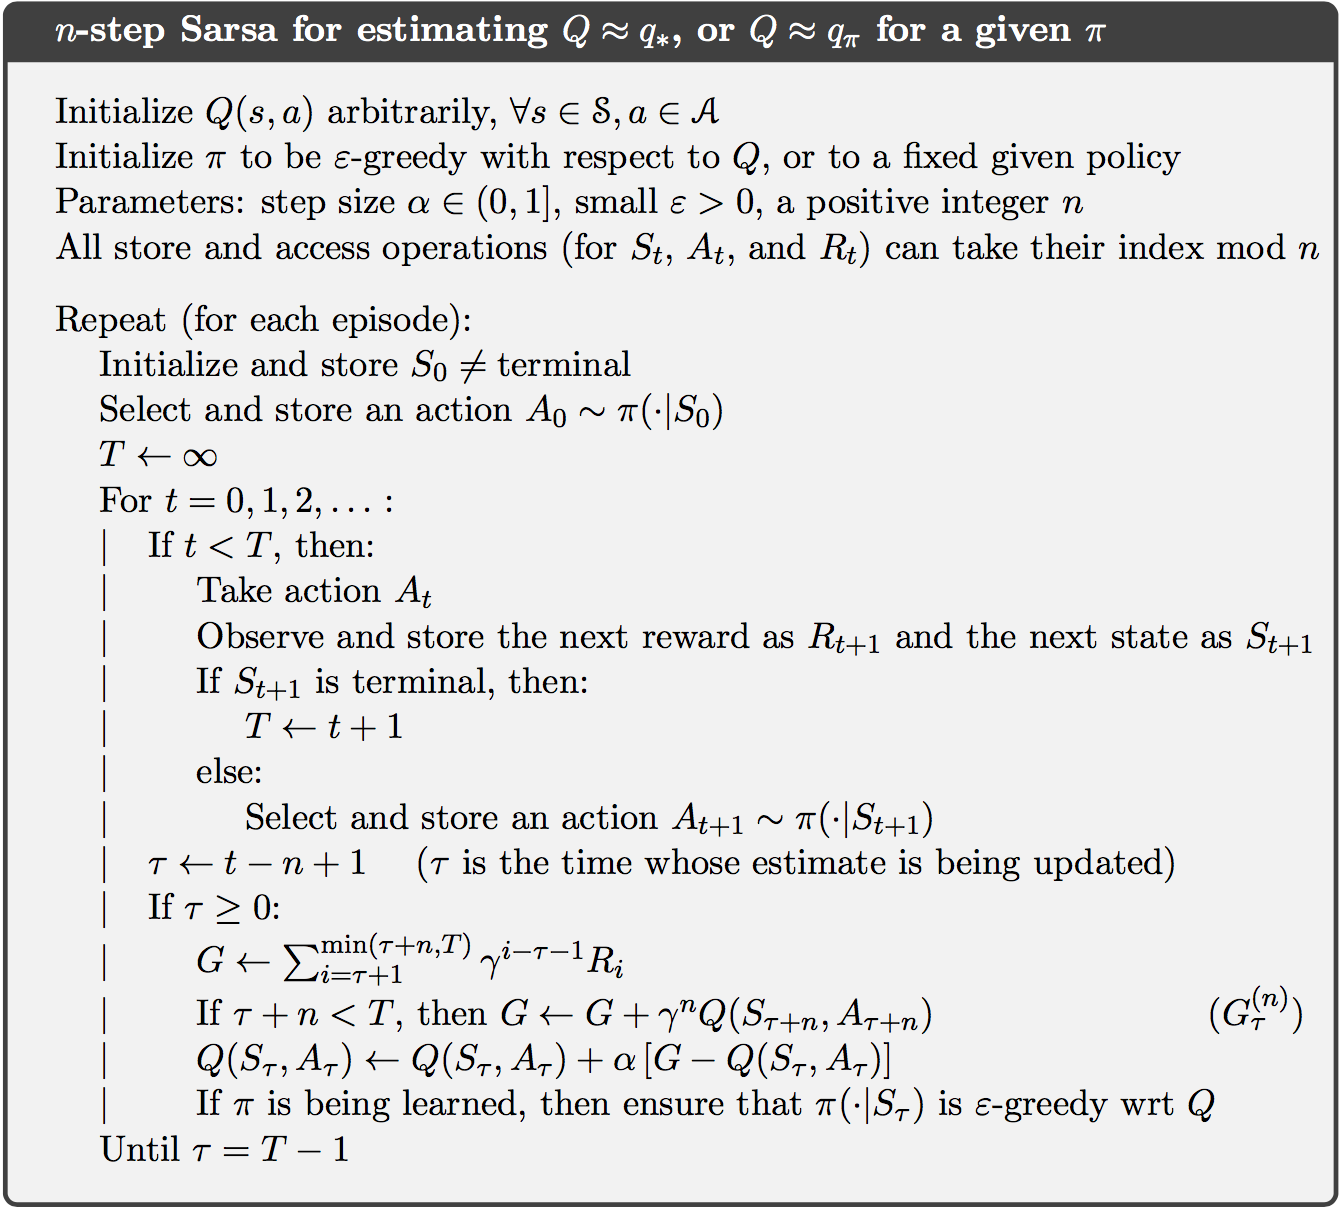

In [42]:
from IPython.display import Image
Image(filename='SARSA_N.png')

In [44]:
def sarsa_n(EPSILON, ALPHA, n_step):

    Q = initializeQ()

    for episode_i in range(NUM_EPISODES):
        episode = generateEpisodeBehaviorPolicy(EPSILON, Q)

        for step in range(len(episode[0])):
            state, action, reward = episode[0][step]
            if (step + n_step < len(episode[0])):
                exp_return = reward
                for n in range(1, n_step):
                    nextState, nextAction, nextReward = episode[0][step + n]
                    exp_return += (GAMMA ** n) * nextReward
                nextState, nextAction, nextReward = episode[0][step + n_step]
                exp_return += (GAMMA ** n_step) * Q[nextState][nextAction]
                Q[state][action] += ALPHA * (exp_return - Q[state][action])
    return Q

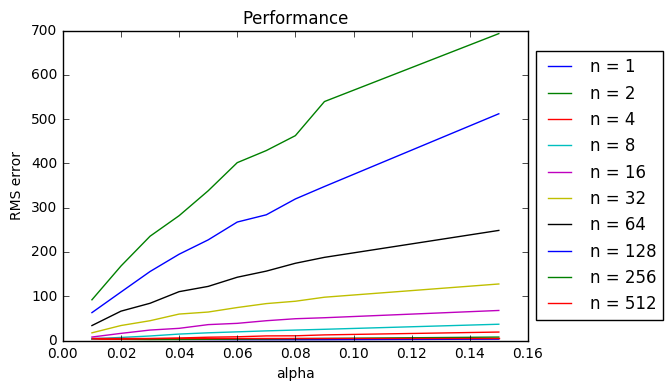

In [138]:
all_n = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.15]
error = np.zeros((len(all_n), len(alphas)))
for run in range(n_runs):
    for nInd, n in zip(range(len(all_n)), all_n):
        for alphInd, alpha in zip(range(len(alphas)), alphas):
            Q = sarsa_n(EPSILON, alpha, n)
            currentStateValues = np.asarray([Q[state][action] for state in states for action in actions])
            error[nInd][alphInd] += np.sqrt(np.sum(np.power(currentStateValues - realStateValues, 2)) / len(states))

error /= NUM_EPISODES
for i in range(len(all_n)):
    plt.plot(alphas, error[i, :], label='n = ' + str(all_n[i]))
    
plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance')
plt.show()

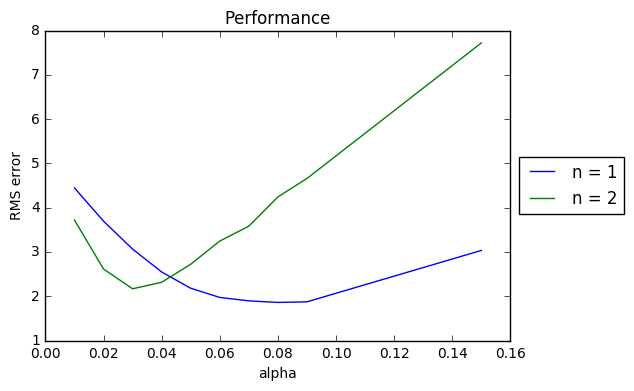

In [145]:
for i in range(2):
    plt.plot(alphas, error[i, :], label='n = ' + str(all_n[i]))
    
plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance')
plt.show()

### SARSA($\lambda$):

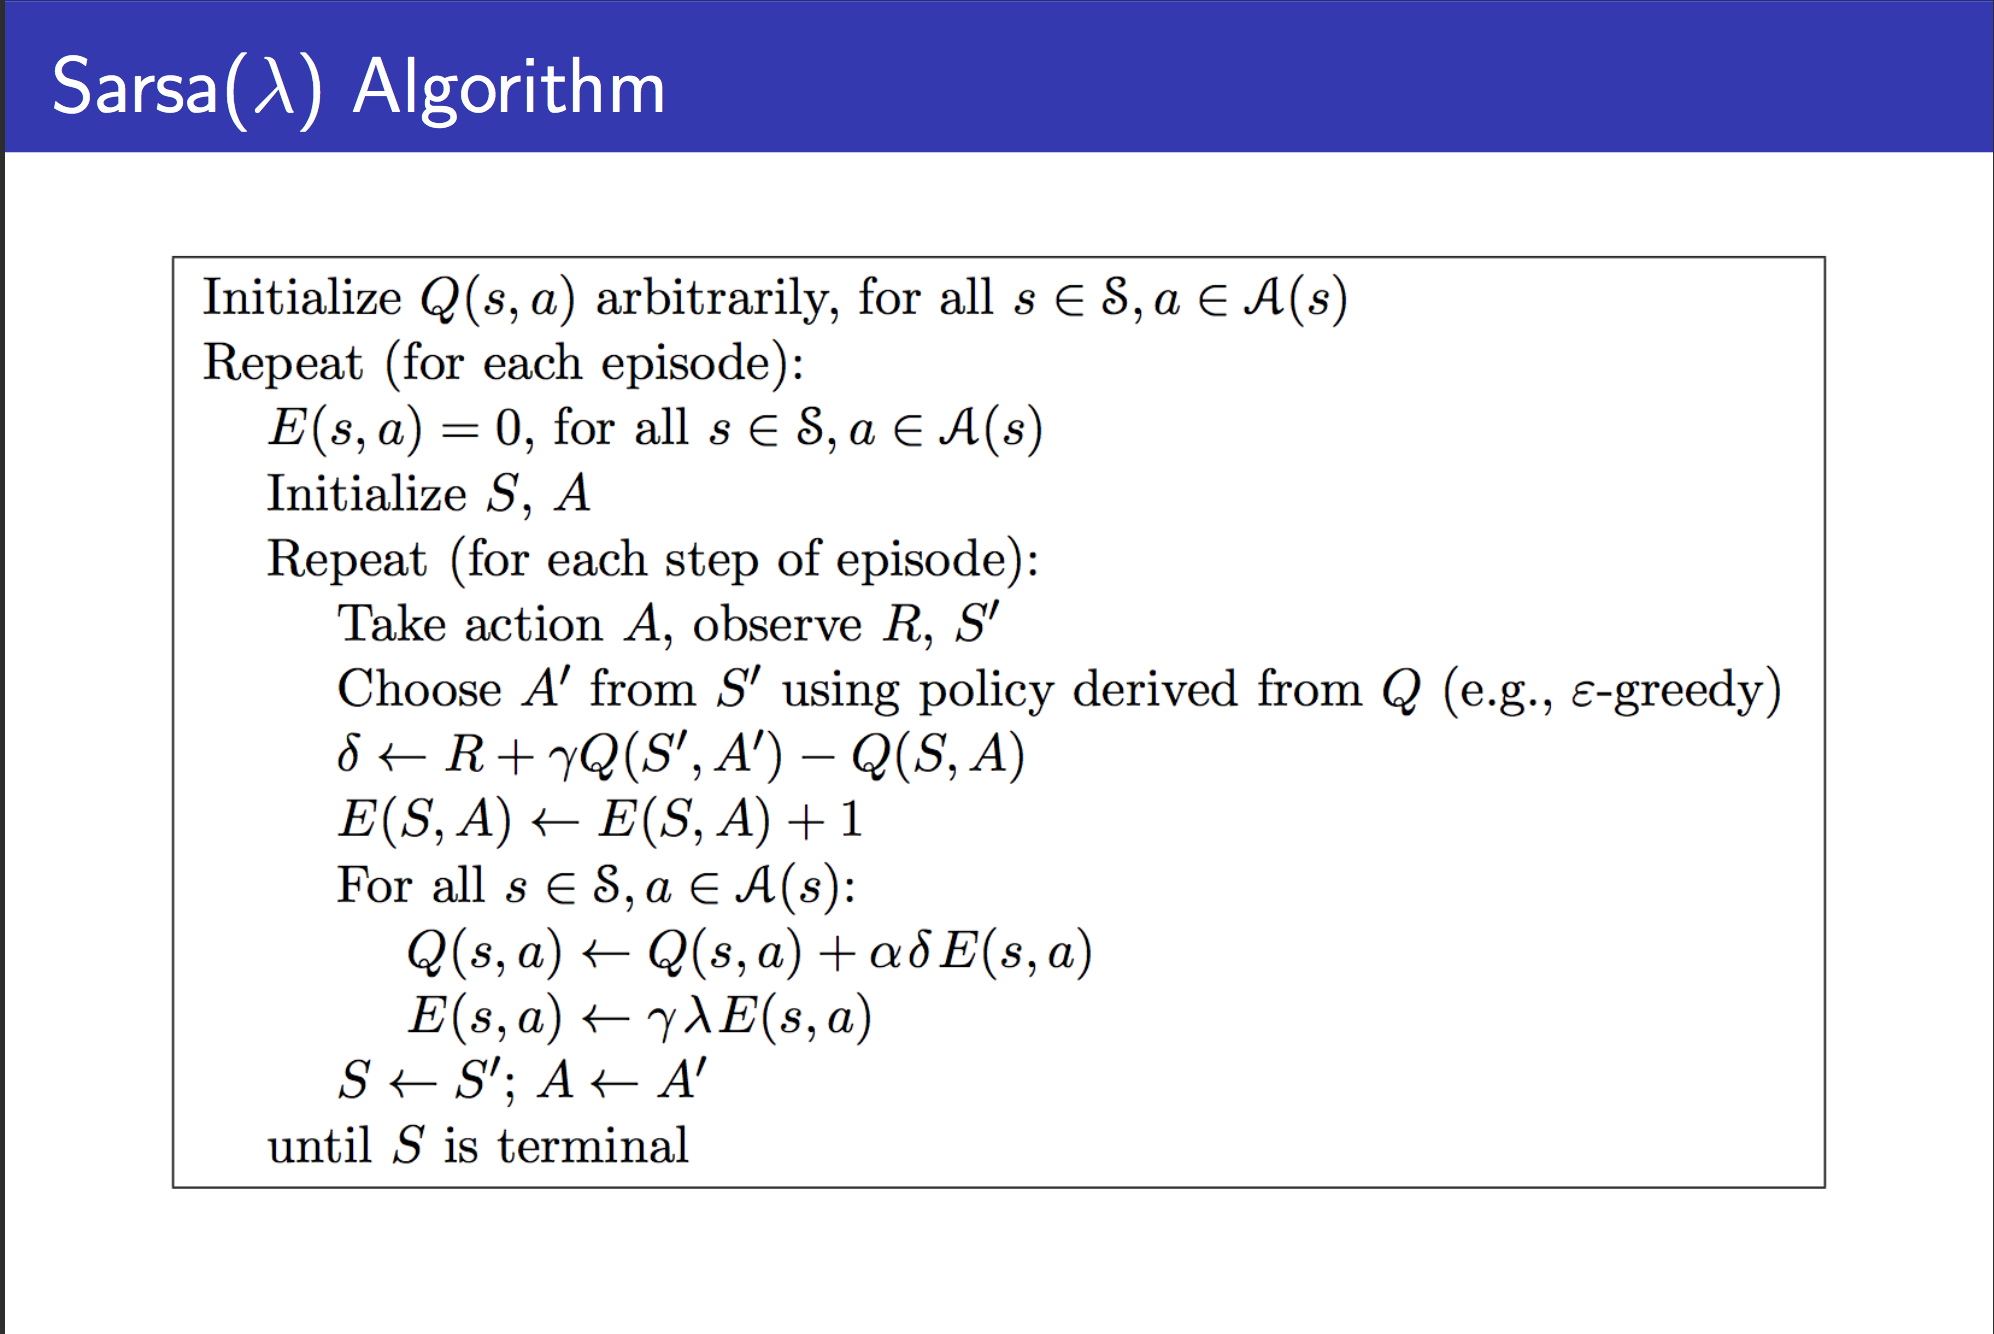

In [16]:
from IPython.display import Image
Image(filename='SARSA_LAMBDA.png')

In [125]:
def sarsa_lambda(EPSILON, ALPHA, lambd):
    episode_rewards = np.zeros(NUM_EPISODES)

    Q = initializeQ()
    E = initializeQ()

    for episode_i in range(NUM_EPISODES):
        episode = generateEpisodeBehaviorPolicy(EPSILON, Q)

        for step in range(len(episode[0])):
            state, action, reward = episode[0][step]
            if (step + 1 < len(episode[0])):
                nextState, nextAction, nextReward = episode[0][step + 1]
                delta = reward + GAMMA * Q[nextState][nextAction] - Q[state][action]
                E[state][action] += 1

                for s in states:
                    for a in actions:
                        Q[s][a] += ALPHA * delta * E[s][a]
                        E[s][a] = GAMMA * lambd * E[s][a]

    return Q

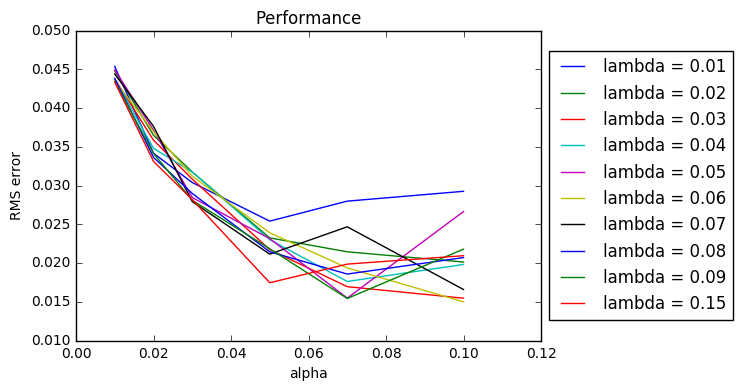

In [168]:
alphas = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
lambdas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.15]
error_lambda = np.zeros(((len(lambdas),len(alphas))))
          
for alphInd, alpha in zip(range(len(alphas)), alphas):
    for lambInd, lambd in zip(range(len(lambdas)), lambdas):
        Q = sarsa_lambda(EPSILON, alpha, lambd)
        currentStateValues = np.asarray([Q[state][action] for state in states for action in actions])
        error_lambda[lambInd][alphInd] += np.sqrt(np.sum(np.power(currentStateValues - realStateValues, 2)) / len(states))

error_lambda /= NUM_EPISODES

for i in range(len(lambdas)):
    plt.plot(alphas, error_lambda[i,:], label='lambda = ' + str(lambdas[i]))
    
plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance')
plt.show()

### Discussion:

* Both the algorithms perfrom well for small values of alpha
* In GridWorld domain n-step SARSA works best when step value is 1 or 2. Error increases for higher step sizes.
* SARSA($\lambda$) performs well for small values of lambda.
* SARSA($\lambda$) has lower R.M.S error than n-step SARSA (SARSA is considered as ground truth)